# Compare 2 Surf En

In [22]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sim import calculations as calc
from sim import utils

sns.set_theme()

###

data_dirs = [
    "/home/max/projects/apfc/data/line1dn0",
    "/home/max/projects/apfc/data/line1dn0"
]

surf_en_indeces = [10, -1]

names = ["with n0", "without n0"]

colors = ["r", "b"]
line_widths = [1, 0.5]

normalize = False

with n0 eps: 0.0294, gamma0: 0.4507
without n0 eps: 0.0294, gamma0: 0.4522


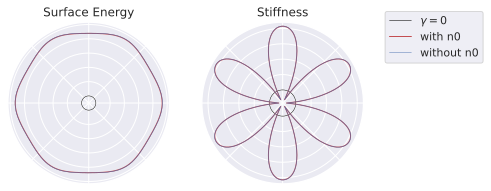

In [23]:
def fill(arr, div, add=False):

    max_ = np.max(arr)

    o_arr = arr.copy()[1:]
    do_add_int = int(add)

    for i in range(1, div):
        add_arr = do_add_int * i * max_
        arr = np.hstack([arr, o_arr + add_arr])

    return arr


def norm(arr):
    ret = arr - np.min(arr)
    return ret / np.max(ret) 

configs = []
thetas = []
thetas_str = []
surf_ens = []
stiffs = []

for data_dir in data_dirs:

    ### Config ###

    config_path = f"{data_dir}/config.json"
    with open(config_path, "r") as f:
        config = json.load(f)

    ### Surf En ###

    surf_en = pd.read_csv(f"{data_dir}/surf_en.csv", index_col=0)
    surf_en = surf_en.apply(pd.to_numeric)

    ### Thetas ###

    theta_str = surf_en.columns.to_numpy()
    theta = utils.get_thetas(config)

    ### stiffness ###

    orig_theta_len = theta.shape[0]
    stiff = pd.DataFrame(columns=surf_en.columns, index=surf_en.index)

    for i, row in surf_en.iterrows():

        surf_row = row.to_numpy().copy()
        surf_row = fill(surf_row, 3)

        stiff_row = calc.calc_stiffness(surf_row, theta)

        stiff.loc[i, :] = stiff_row[orig_theta_len - 1 : 2 * orig_theta_len - 1]

    ### Fill ###

    div = config["theta_div"]
    theta = fill(theta, div, True)

    ### Appends ###
    
    configs.append(config)
    surf_ens.append(surf_en)
    thetas.append(theta)
    thetas_str.append(theta_str)
    stiffs.append(stiff)

###

fig = plt.figure()
ax_surf = plt.subplot(121, projection="polar")
ax_stiff = plt.subplot(122, projection="polar")

ax_surf.set_aspect("equal")
ax_stiff.set_aspect("equal")

plot_stiff = []
plot_surf = []
surf_lim = [0., 0.]
stiff_lim = [0., 0.]
for i in range(len(surf_ens)):

    surf = fill(surf_ens[i].iloc[surf_en_indeces[i], :], configs[i]["theta_div"])
    stiff = fill(stiffs[i].iloc[surf_en_indeces[i], :], configs[i]["theta_div"])

    if normalize:

        surf = norm(surf)
        stiff = norm(stiff)

    plot_stiff.append(stiff)
    plot_surf.append(surf)

    surf_lim[0] = np.min([surf_lim[0], np.min(surf)])
    stiff_lim[0] = np.min([stiff_lim[0], np.min(stiff)])

    surf_lim[1] = np.max([surf_lim[1], np.max(surf)])
    stiff_lim[1] = np.max([stiff_lim[1], np.max(stiff)])

add_lim = 0.05

surf_lim[1] += add_lim
stiff_lim[1] += add_lim

surf_lim[0] -= add_lim
stiff_lim[0] -= add_lim

if surf_lim[0] < 0 < surf_lim[1]:
    ax_surf.plot(thetas[0], np.zeros(thetas[0].shape), c="black", lw=0.5)

if stiff_lim[0] < 0 < stiff_lim[1]:
    ax_stiff.plot(thetas[0], np.zeros(thetas[0].shape), c="black", label="$\\gamma=0$", lw=0.5)

for i in range(len(plot_surf)):

    ax_surf.plot(thetas[i], plot_surf[i], c=colors[i], label=names[i], lw=line_widths[i])
    ax_stiff.plot(thetas[i], plot_stiff[i], c=colors[i], label=names[i], lw=line_widths[i])

    eps, gamma0 = calc.fit_surf_en(thetas[i], plot_surf[i])
    print(names[i], f"eps: {eps:.4f}, gamma0: {gamma0:.4f}")

ax_surf.set_title("Surface Energy")
ax_stiff.set_title("Stiffness")
ax_stiff.legend(bbox_to_anchor=(1.1, 1.1))

ax_surf.set_xticklabels([])
ax_surf.set_yticklabels([])
ax_stiff.set_xticklabels([])
ax_stiff.set_yticklabels([])

ax_surf.set_ylim(surf_lim)
ax_stiff.set_ylim(stiff_lim)

plt.show()

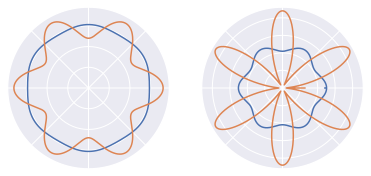

In [146]:
x = np.linspace(0, 2 * np.pi, 10000)

y1 = calc.theo_surf_en(x, -0.02, 0.3)
y2 = calc.theo_surf_en(x, 0.2, 0.3)

stiff1 = calc.calc_stiffness(y1, x)
stiff2 = calc.calc_stiffness(y2, x)

plt.figure()
ax = plt.subplot(121, projection="polar")
ax2 = plt.subplot(122, projection="polar")
ax.set_aspect("equal")
ax2.set_aspect("equal")
ax.plot(x, y1, label="y1")
ax.plot(x, y2, label="y2")
ax2.plot(x, stiff1, label="y1")
ax2.plot(x, stiff2, label="y2")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax.set_ylim([0, np.max([np.max(y1), np.max(y2)]) + 0.03])

plt.show()

In [82]:
def norm(arr):
    ret = arr - np.min(arr)
    return ret / np.max(ret) 

def fill(arr, div, add=False):

    max_ = np.max(arr)

    o_arr = arr.copy()[1:]
    do_add_int = int(add)

    for i in range(1, div):
        add_arr = do_add_int * i * max_
        arr = np.hstack([arr, o_arr + add_arr])

    return arr

a = np.array([0, 0.5, 1])

print(norm(a))

print(fill(a, 3, True))

print(np.pi /3)

[0.  0.5 1. ]
[0.  0.5 1.  1.5 2.  2.5 3. ]
1.0471975511965976


26.666753528126677


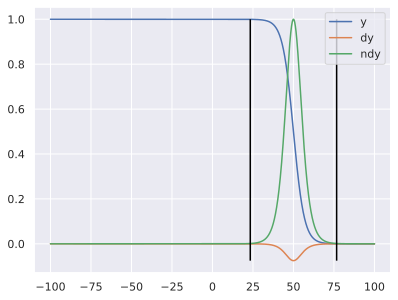

In [121]:
import scipy

def tanhmin(radius: np.array, eps: float) -> np.array:
    return 0.5 * (1.0 + np.tanh(-3.0 * radius / eps))
def norm(arr):
    ret = arr - np.min(arr)
    return ret / np.max(ret) 

r = 50
eps = 20
scale = 1

x = np.linspace(-100, 100, 10000)
y = tanhmin(x - r, eps) * scale

plt.figure()
plt.plot(x, y, label = "y")

dy = np.gradient(y, x)
plt.plot(x, dy, label="dy")

ndy = norm(np.abs(dy))
plt.plot(x, ndy, label="ndy")

indy = scipy.integrate.simpson(ndy, x)

ilen = 2 * indy

print(ilen)

plt.vlines(x=r - ilen, ymin=np.min(dy), ymax=scale, color="black")
plt.vlines(x=r + ilen, ymin=np.min(dy), ymax=scale, color="black")

plt.legend()
plt.show()